Done. You have the matrices PP QQ  RR  SS  WW.
 
PP
(2, 2)
[[0.4826 0.4826]
 [0.4826 0.4826]]
 
RR
(11, 2)
[[  0.3091   0.3091]
 [  0.18     0.18  ]
 [ -0.1945  -0.1945]
 [  0.3091   0.3091]
 [  0.3091   0.3091]
 [  0.36     0.    ]
 [  0.       0.36  ]
 [-19.6945  19.3055]
 [ 19.3055 -19.6945]
 [ -0.0222  -0.    ]
 [ -0.      -0.0222]]
 
QQ
(2, 2)
[[ 0.7799 -0.7045]
 [-0.7045  0.7799]]
 
SS
(11, 2)
[[  0.1526   0.1526]
 [  0.5      0.5   ]
 [  1.5074   1.5074]
 [  0.1526   0.1526]
 [  0.1526   0.1526]
 [  1.       0.    ]
 [  0.       1.    ]
 [ 31.1949 -28.1801]
 [-28.1801  31.1949]
 [  0.0348   0.    ]
 [  0.       0.0348]]
 
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
Response_named = 
[['capital 1   ' '-3.4040181366400155' '-1.9048450968824804' ...
  '-1.1804223184210703' '0.9549407195191129' '-1.5910103891466834']
 ['capital 2   ' '-0.4085667145171237' '-2.09

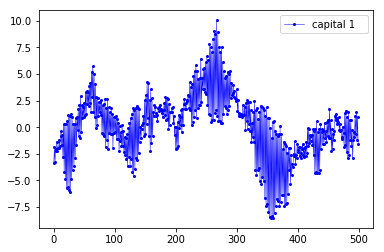

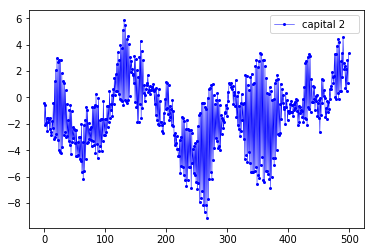

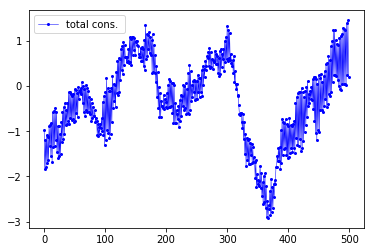

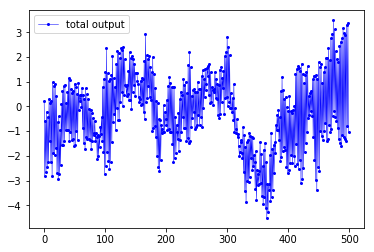

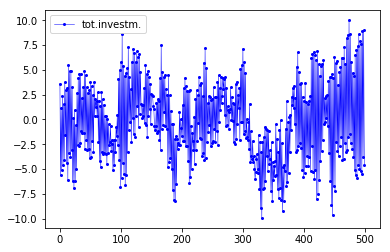

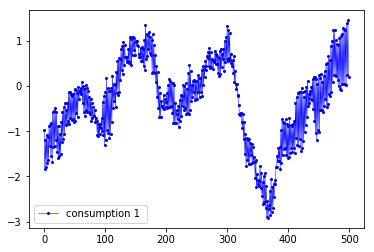

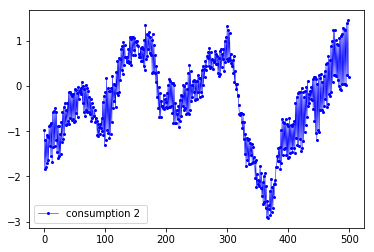

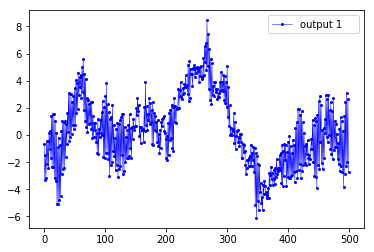

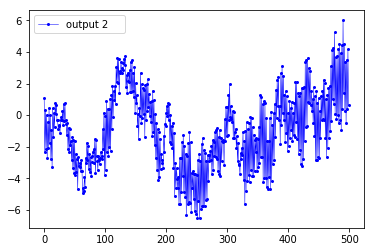

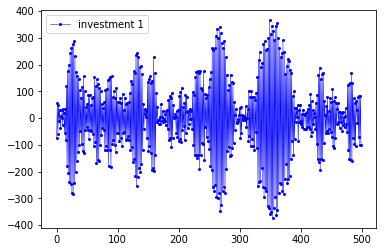

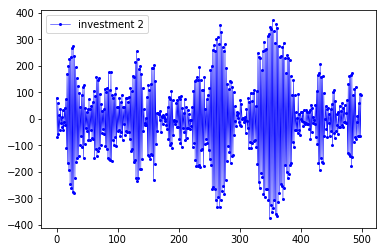

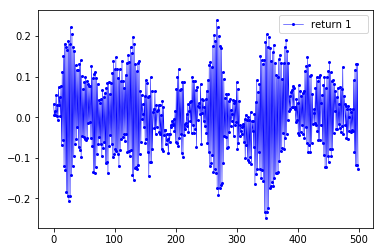

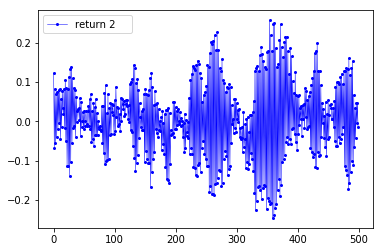

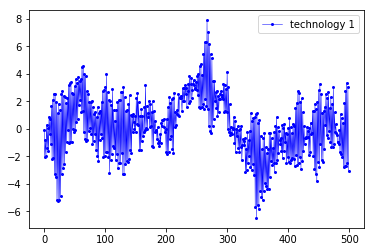

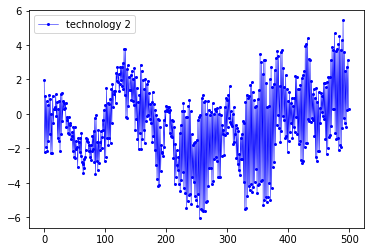

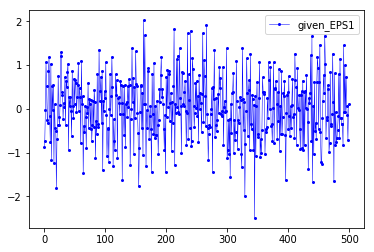

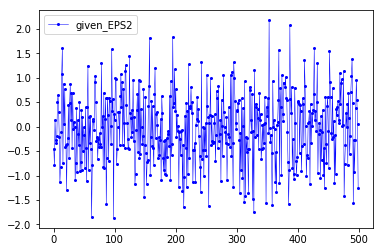

In [2]:
#  Uhlig's Exampl7.m
#  Two Country Stochastic Neoclassical Growth Model


import numpy as np


Z_bar_1   = 1
Z_bar_2   = 1
rho_1     = 0.36
rho_2     = 0.36
delta_1   = 0.025
delta_2   = 0.025
N_bar_1   = 1/2
N_bar_2   = 1/2
C_1_frac  = 0.5
betta     = 0.99
eta_1     = 1.0
eta_2     = 1.0

psi_1     = 0.95
psi_2     = 0.95

Sigma_EPS = 0.712
corr_12   = 0


R_bar_1   = 1.0/betta
R_bar_2   = 1.0/betta

YK_bar_1  = (R_bar_1 - 1 + delta_1)/rho_1
YK_bar_2  = (R_bar_2 - 1 + delta_2)/rho_2

K_bar_1 = N_bar_1 * ( Z_bar_1 / YK_bar_1 )**(1.0/(1-rho_1))
K_bar_2 = N_bar_2 * ( Z_bar_2 / YK_bar_2 )**(1.0/(1-rho_2))

Y_bar_1 = YK_bar_1 * K_bar_1
Y_bar_2 = YK_bar_2 * K_bar_2

X_bar_1 = delta_1 * K_bar_1
X_bar_2 = delta_2 * K_bar_2

Y_bar = Y_bar_1 + Y_bar_2
X_bar = X_bar_1 + X_bar_2

C_bar   = Y_bar - X_bar
C_bar_1 = C_1_frac * C_bar
C_bar_2 = (1-C_1_frac)*C_bar


VARNAMES = ['capital 1   ',
            'capital 2   ',
            'total cons. ',
            'total output',
            'tot.investm.',
            'consumption 1 ',
            'consumption 2 ',
            'output 1    ',
            'output 2    ',
            'investment 1',
            'investment 2',
            'return 1    ',
            'return 2    ',
            'technology 1',
            'technology 2',]


AA = np.vstack(([0, 0],  
                          [0, 0],
                          [0, 0],
                          [0, 0],
                          [0, 0], 
                          [0, 0],
                          [0, 0],
                          [-1, 0],
                          [0, -1],
                          [0, 0],
                          [0, 0]))


BB = np.vstack(([0, 0], 
                           [0, 0], 
                           [0, 0],  
                           [0, 0],  
                           [0, 0], 
                           [rho_1, 0], 
                           [0, rho_2],
                           [(1-delta_1),0],
                           [0,(1-delta_2)],
                           [-rho_1*YK_bar_1,0],
                           [0,-rho_2*YK_bar_2 ]))       

CC = np.vstack(([C_bar,-Y_bar, X_bar, 0,  0,    0,  0,    0,  0,  0,  0],
                           [0, 0,-X_bar, 0,  0, 0, 0, X_bar_1,X_bar_2, 0,0],
                           [0,-Y_bar, 0, 0, 0, Y_bar_1,Y_bar_2, 0, 0, 0, 0],
                           [-C_bar,0,0, C_bar_1,C_bar_2,0, 0, 0, 0, 0, 0],
                           [0, 0, 0,  eta_1,-eta_2, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0,  -1, 0, 0, 0, 0, 0],
                           [0,0,0, 0, 0, 0, -1, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0,delta_1,0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, delta_2, 0, 0],
                           [0, 0, 0, 0, 0, rho_1*YK_bar_1,0, 0, 0, -R_bar_1,0],
                           [0, 0, 0, 0, 0, 0, rho_2*YK_bar_2, 0, 0, 0,-R_bar_2 ]))

DD = np.vstack(([0,0],
                           [0,0],
                           [0,0],
                           [0,0],
                           [0,0],
                           [1,0],
                           [0,1],
                           [0,0],
                           [0,0],
                           [0,0],
                           [0,0]))

FF = np.vstack(([0, 0],
                          [0, 0]))

GG = np.vstack(([0, 0],
                            [0, 0]))

HH = np.vstack(([0, 0],
                           [0, 0]))

JJ = np.vstack(([0, 0, 0, -eta_1, 0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, -eta_2, 0, 0, 0, 0, 0, 1]))

KK = np.vstack(([0, 0, 0, eta_1, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, eta_2, 0, 0, 0, 0, 0, 0]))

LL = np.vstack(([0, 0],
                          [0, 0]))

MM = np.vstack(([0, 0],
                            [0, 0]))


NN = np.vstack(([psi_1, 0],
                           [0, psi_2]))

Sigma = [ Sigma_EPS**2]*np.vstack(([1, corr_12],[corr_12, 1]))

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

print(' ')
print('PP')
print(PP.shape)
print(PP)
print(' ')
print('RR')
print(RR.shape)
print(RR)
print(' ')
print('QQ')
print(QQ.shape)
print(QQ)
print(' ')
print('SS')
print(SS.shape)
print(SS)
print(' ')

%run Uhlig_simul_rand.ipynb

%run Uhlig_plot_simul_all.ipynb
